In [2]:
from qiskit import IBMQ

IBMQ.save_account("4a2b1a36805ecf250f886c317cafd3bbdf55633282b8df8b8b08857d20356615132b9d174cc3a31bd54ccabf228f08658ebedf07f8b52c67619bdf0dff703bc7")

configrc.store_credentials:WARNING:2024-01-29 11:14:51,816: Credentials already present. Set overwrite=True to overwrite.


In [3]:
# Initialisation
import numpy as np

# import Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

# Import basic plot tools.
from qiskit.visualization import plot_histogram

In [4]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [5]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

There are a few interesting observations we can find from this dataset description:

There are 150 samples (instances) in the dataset.

There are four features (attributes) in each sample.

There are three labels (classes) in the dataset.

The dataset is perfectly balanced, as there are the same number of samples (50) in each class.

We can see features are not normalized, and their value ranges are different, e.g. \[4.3,7.9\], 
 and \[01,2.5\]
 for sepal length and petal width, respectively. So, transforming the features to the same scale may be helpful.

As stated in the table above, feature-to-class correlation in some cases is very high; this may lead us to think that our model should cope well with the dataset.

We only examined the dataset description, but additional properties are available in the iris_data object. Now we are going to work with features and labels from the dataset.

In [6]:
features = iris_data.data
labels = iris_data.target

Normalize the features; transform all the features onto 0-1.

In [7]:
from sklearn.preprocessing import MinMaxScaler
features = MinMaxScaler().fit_transform(features)

In [27]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(features, columns=iris_data.feature_names)
df['class'] = pd.Series(iris_data.target_names)

sns.pairplot(df, hue='class', palette='tab10')

In the pair-plot above we can observe that some 

# Training a classical model

Training a machine learning model generally involves feeding the model a section of the data, inlcuding labels, this is called 'Supervised Learning'. This will allow the model to gain an understanding of what feature values line up with the classification or label values. In general, 80% of the data set will be used for training. The other 20% will be called the 'test set'. These will be from the same data set, but will have the target label removed. It is then up to the machine learning model to attempt to classify the new data. We will then check what the model predicted for the test data against what the correct labels are to quantify how good the model will be at classifying new data. 

## Support Vector Machine (SVM)

**Support Vector Machine (SVM)** is a supervised machine learning algorithm used for both classification and regression tasks. However, it is more commonly used in classification problems. 

### Key Features:

- **Classification Boundaries**: SVMs are best known for their ability to create non-linear boundaries with the help of kernel functions.

- **Margin Maximization**: The core idea of SVM is to identify the best decision boundary (hyperplane) that separates classes in the feature space. This boundary is chosen to be the one that has the maximum margin, i.e., the maximum distance between data points of both classes.

### Applications:

- SVMs are used in applications like face detection, handwriting recognition, image classification, and many areas of biology and physics.

### Advantages:

**Versatility**: Different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

### Disadvantages:

- **Sensitivity to Noisy Data**: SVMs are sensitive to the type of kernel used and can overfit if the data is very noisy.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df_full = pd.DataFrame(iris.data, columns=iris.feature_names)

# Define DataFrames, each missing one feature
feature_columns = iris.feature_names
dfs = {feature: df_full.drop(columns=[feature]) for feature in feature_columns}

# Initialize a dictionary to store train and test splits
train_test_data = {}

# Iterate over each DataFrame and perform train-test split
for feature_missing, df in dfs.items():
    X = df
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    # Store the train-test data
    train_test_data[feature_missing] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

/var/folders/t0/7r1s1xhd3r588zrbxd8d1pk80000gn/T/ipykernel_6601/2198818327.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 4701

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size = 0.8, random_state = algorithm_globals.random_seed)

In [24]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

In [25]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.90


# Training a QML Model

We are training a 'Variational Quanum Classifier', or VQC. It takes a map and an ansatz and constructs a quantum neural network automatically. In the simplest case it is enough to pass the number of qubits and a quantum instance to construct a valid classifier. 

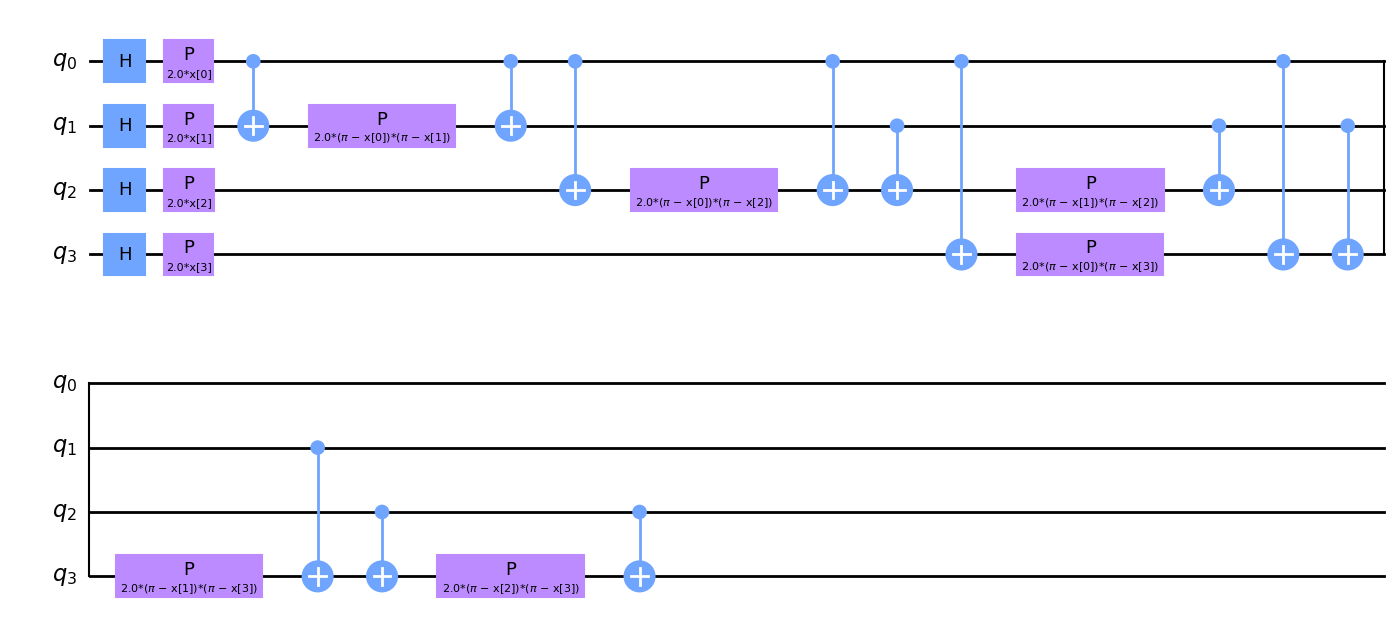

In [13]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
feature_map.decompose().draw('mpl', fold=20)

## ZZFeatureMap
The ZZFeatureMap specifically involves the application of Z⊗Z interactions, where "Z" represents the Pauli-Z operator, applied to pairs of qubits. These interactions, combined with single-qubit rotations that encode the input data, create entangled quantum states that reflect the structure of the input data. The name ZZFeatureMap comes from the use of these ZZ interactions, which are key to the map's ability to capture and exploit correlations in the input data in a way that is uniquely quantum.

x\[0\] ,,, x\[3\] are placehoders for the features.

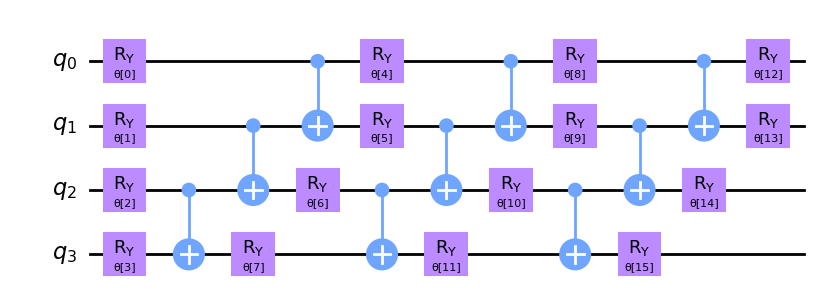

In [14]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
ansatz.decompose().draw('mpl', fold = 20)

The parameters x\[0\] to x\[15\] are the trainable weights of the classifier. 

In [15]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

Using a simulator to train: 

In [16]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [18]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []

# objective function characterizes the distance between the predictions and known labeled data.

plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
# Append the value of the objective function to an array so we 
# can plot the iteration verses the objective function value
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

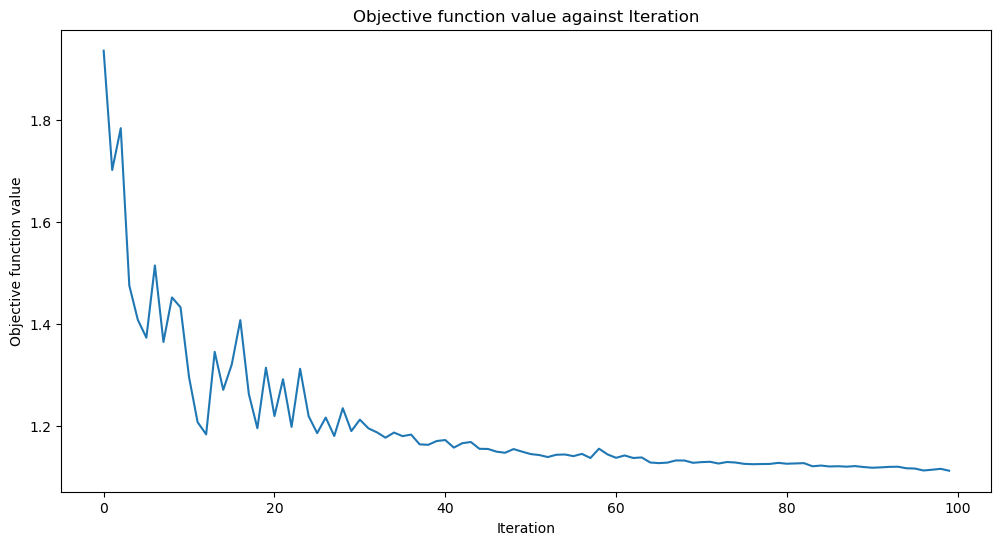

Training time: 52.51935911178589


In [21]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [59]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.87


# Feature Reduction

In [60]:
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

<AxesSubplot:>

In [41]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}") 

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.93


In [42]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

In [43]:
optimizer = COBYLA(maxiter=40) # reduction of iterations due to fewer qubits

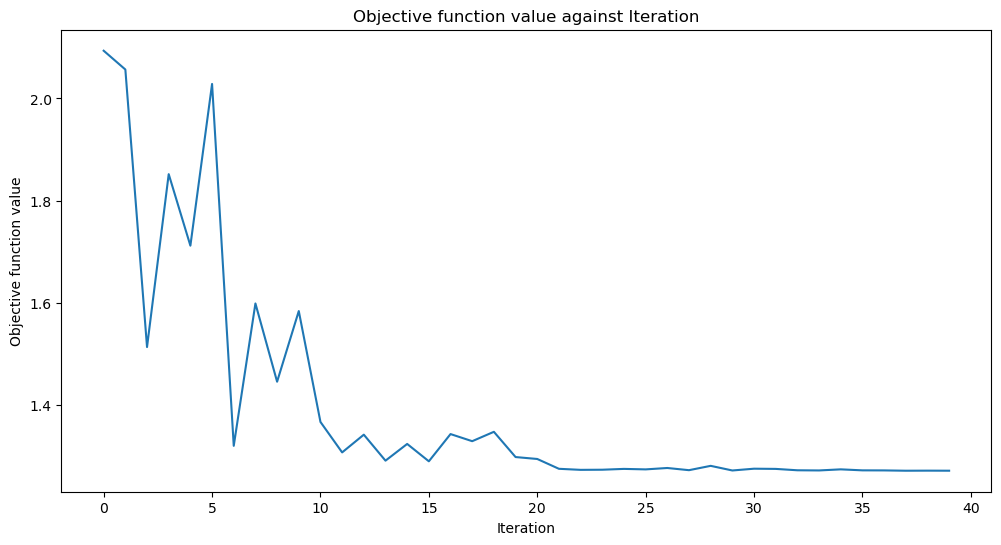

Training time: 11 seconds


In [44]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [45]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.57
Quantum VQC on the test dataset using RealAmplitudes:     0.63


Note the objective function is almost flattening, meaning increasing the number of iterations won't be able to increase the score. We will need to try another ansatz. 

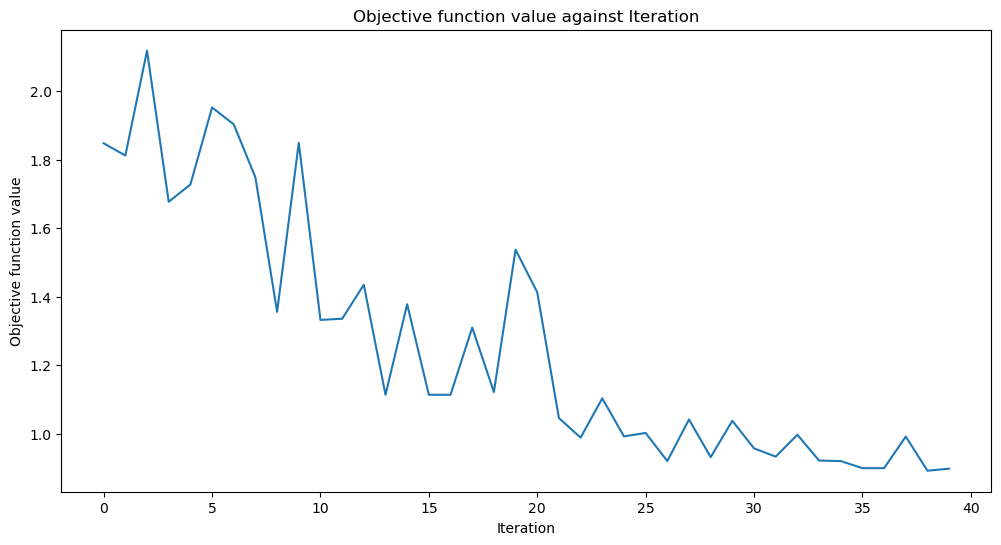

Training time: 14 seconds


In [46]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [47]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.78
Quantum VQC on the test dataset using EfficientSU2:     0.80


Better than previous. lets try increase the number of iterations. 

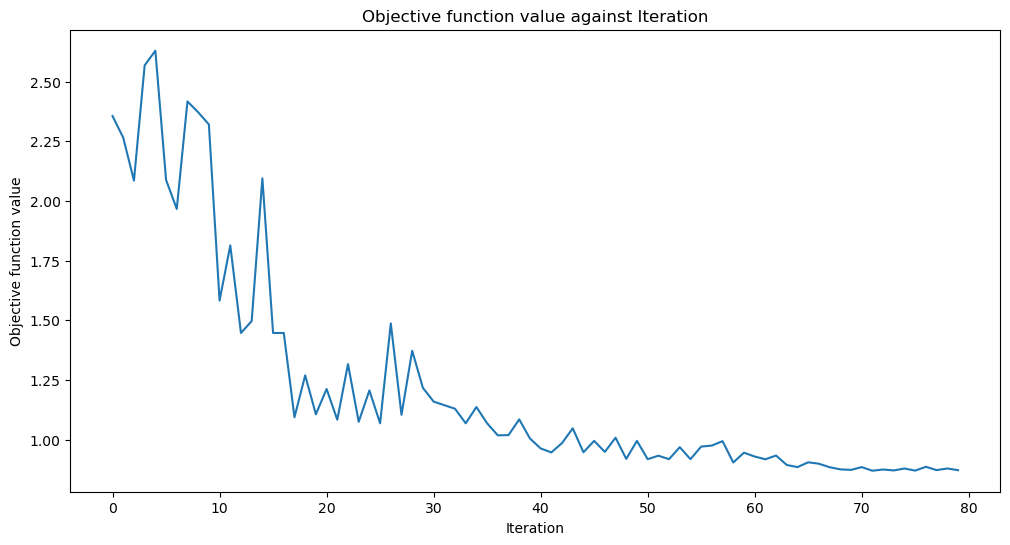

Training time: 27 seconds


In [51]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=80)

vqc2 = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc2.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [55]:
train_score_q3_eff = vqc2.score(train_features, train_labels)
test_score_q3_eff = vqc2.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q3_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q3_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.75
Quantum VQC on the test dataset using EfficientSU2:     0.83


In [58]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")
   

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.99 |       0.90
VQC, 4 features, RealAmplitudes |       0.79 |       0.87
----------------------------------------------------------
SVC, 2 features                 |       0.97 |       0.93
VQC, 2 features, RealAmplitudes |       0.57 |       0.63
VQC, 2 features, EfficientSU2   |       0.75 |       0.83


Resources: 

- [IBM](https://qiskit.org/ecosystem/machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html) 
- [QML Summer School 2021](https://youtube.com/playlist?list=PLOFEBzvs-VvqJwybFxkTiDzhf5E11p8BI&si=zTRQ8YI7knonf7Nw)